# Clustering II: El problema del Profesor Santiago

El Profesor Santiago se encuentra realizando un proyecto de investigación para la detección de una enfermedad que afecta a las células de la sangre. Sin embargo, se acaba de dar cuenta que una parte muy importante de su trabajo esta en el computador de la oficina. Debido a la contingencia del COVID, el profesor Santiago no queria salir de su casa, y al voler noto que su computador de la oficina habia sido formateado. Él se enteró que los estudiantes del curso de de Aprendizaje automático de máquinas son expertos en k-means, por esta razón se comunicó con el profesor Alexander para ver si los estudiantes podian ayudarlo a implementar el algoritmo que el habia implementado. El profesor Alexander aprovechó esta oportunidad para evaluar sus conocimientos en clustering. Lo que el profesor Santiago quiere es que ustedes por medio de técnicas de clustering desarrollen un algoritmo para segmentar una imagen de células en diferentes componentes a las cuales el más adelante puede colocar un label, tal como: citoplasma, nucleo, etc... Para esto el profesor Santiago nos facilitó un pequeño dataset de imagenes de células que el necesita segmentar con urgencia. Este dataset se encuentra en la carpeta *data_set*.

Para realizar este proyecto el profesor Alexander lo organizó en las siguientes tareas:

1. Cargar los datos de las imagenes en Python usando la libreria cv2.
2. Utilizando sus conociientos en clustering desarrollen un algoritmo que sea capaz de segmentar la imágen en diferentes componentes, asociadas con color.
3. Realicen esta operación para todas las imágenes del dataset. ¿funciona bien el algoritmo?
4. En caso que sea necesario incluya modificaciones al algorimo, o su salida, para obtener mejores resultados.

Como el objetivo es evaluar sus conocimientos en agrupamiento, el profesor Alexander también quiere que contesten las siguientes preguntas:

1. ¿Qué puede observar de los datos del problema?
2. ¿Se tuvó que realizar algun tipo de transformación a los datos?, ¿Porqué?
3. ¿Qué mejoras tuvo que hacer en el algoritmo de salida?, ¿Porqué tuvó que hacer estas mejoras?
4. ¿Cómo escogio el valor de $K$?
5. ¿Son los centrodides de los clusters similares para todas las imagenes? ¿Si, no, porqué?
5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clustering y como se aplicó en este proyecto.

Finalmente, el profesor Alexander les pide que entreguen el notebook de jupyter con el código documentado con el análisis de cada una de las partes, es decir una explicación de que hace en cada parte del código; además, deben incluir las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Grupo_ID_ML.

**Nota:** Recuerden que tienen hasta el **Lunes 30 de Agosto** a las 12 de la noche para entregar sus notebooks. Mucha suerte!!



**Librerias**

In [104]:
#Cargar librerias necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from mpl_toolkits.mplot3d import Axes3D

In [105]:
im_paths = list(paths.list_images("data_test/")) #Obtener el path de cada imagen en el dataset

In [106]:
def TensorToMatrix(tensor):
    #Funcion para convertir un tensor en una matriz
    R = []
    G = []
    B = []
    for row in tensor:
        for col in row:
            R.append(col[0])
            G.append(col[1])
            B.append(col[2])
    result = np.column_stack((R,G,B))
    return result

def MatrixToTensor(matrix, nrow):
    #Funcion para convertir una matriz en un tensor dado un numero de filas
    new_shape = (nrow, matrix.shape[0]//nrow, 3)
    new_tensor = np.empty(new_shape)
    aux_count = 0
    for k in range(new_shape[0]):
        for j in range(new_shape[1]):
            new_tensor[k][j] = matrix[aux_count]
            aux_count += 1   
    return new_tensor

def processImg(img_path, model, dilate = False):
    #Leer los datos de la imagen
    img = cv2.imread(img_path) 
    #Aplicacion de la dilatacion
    if dilate: 
        kernel = np.ones((5,5),np.uint8)
        img=cv2.dilate(img,kenel,iterations=2)
    X = TensorToMatrix(img)
    #Normalizacion de los datos
    scaler = StandardScaler()         
    scaler.fit(X)                     
    X_sc =scaler.transform(X)
    #Entrenamiento del modelo
    model.fit(X_sc)
    labels = model.predict(X_sc)
    new_X = np.empty(X_sc.shape)
    #Asignacion de un color a cada etiqueta de los centroides
    for i in range(labels.shape[0]):     
        if labels[i] == 0:
            col = [0,255,0]
        elif labels[i] == 1:
            col = [255,0,0]
        elif labels[i] == 2:
            col = [0,0,255]
        else: col = [165,0,255]
        new_X[i] = col
    new_img = np.uint8(MatrixToTensor(new_X,363))
    return new_img

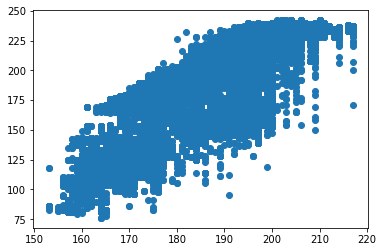

In [107]:
img=cv2.imread('data_test/11.jpg')   # se carga la imagen 
kernel=np.ones((5,5),np.uint8)
img_dilatada=cv2.dilate(img,kernel,iterations=3)
X = TensorToMatrix(img_dilatada)              # se conveierte la imagen a una matriz
plt.scatter(X[:,0],X[:,1])              # se grafican las nos primeras columnas de la matriz para 
                                     # tener una idea de la distribución de los datos 

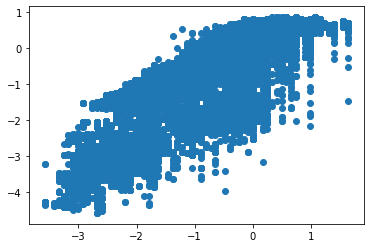

In [108]:
scaler = StandardScaler()         # se inicia el constructor
scaler.fit(X)                     # se obtiene la media y la desvicion estandar de los datos 
X_sc =scaler.transform(X)         # se estandarizan los datos
plt.scatter(X_sc[:,0],X_sc[:,1])     # grafica de los datos estandarizados 

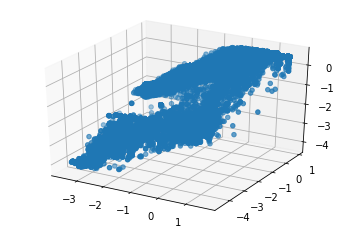

In [109]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter3D(X_sc[:,0],X_sc[:,1],X_sc[:,2])    # grafica 3D de los datos para ver su distribución

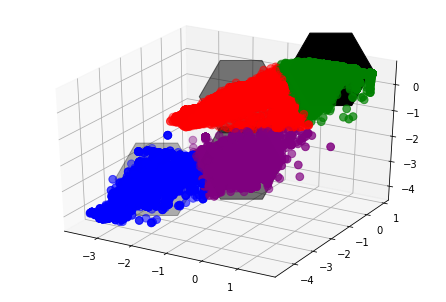

In [110]:
kmeans = KMeans(n_clusters = 4).fit(X_sc)     # se entrena el algoritmo con 4 centroides 
labels = kmeans.predict(X_sc)                 # se etiquetan los datos a partir de los centroides 
centroides = kmeans.cluster_centers_          # coordenadas de los centroides 
colores=['red','green','blue','purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_sc[:, 0], X_sc[:, 1], X_sc[:, 2], c=asignar,s=60)  # grafica los datos de acuerdo al centroide al que pertenecen
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], marker='H', c='black', s=7000) # se grafican los centroides


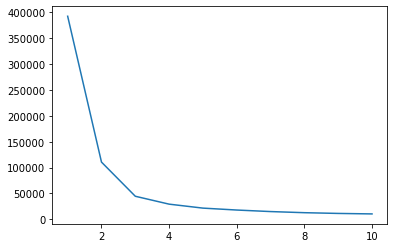

In [111]:
distortion = []
k_clusters = []
for k in range(1,11):
    #Probar el Kmeans con distintos valores de K
    kmeans = KMeans(n_clusters = k).fit(X_sc)
    #Funcion de distorsion
    distortion.append(kmeans.inertia_)
    k_clusters.append(k)

#Grafica Elbow
plt.plot(k_clusters, distortion)

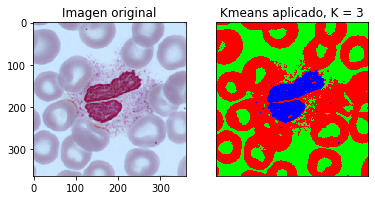

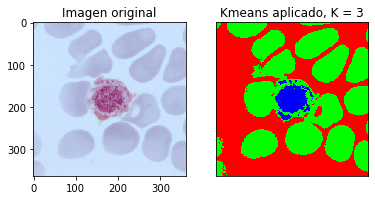

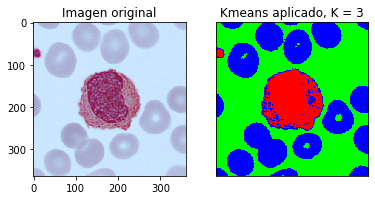

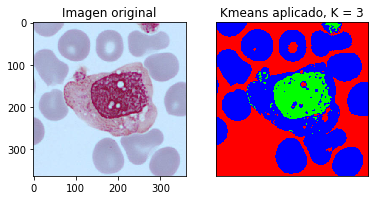

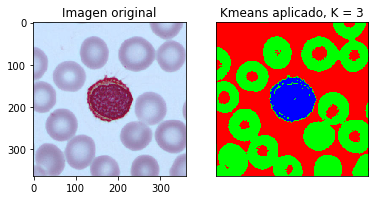

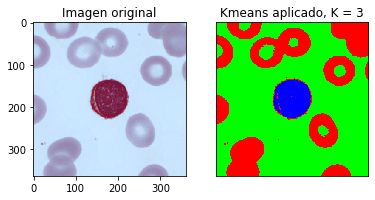

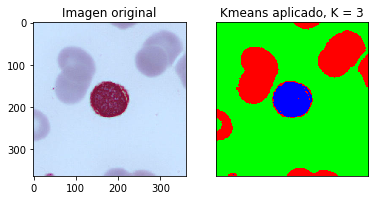

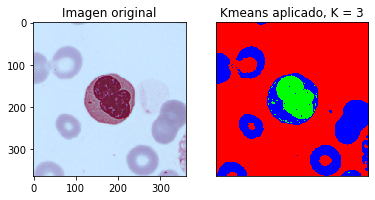

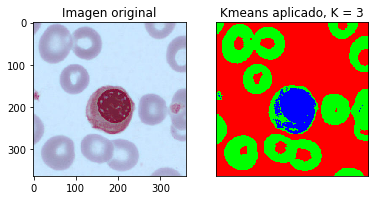

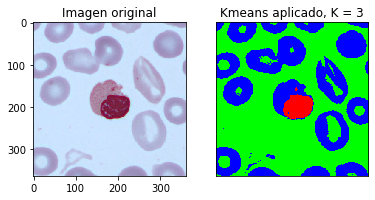

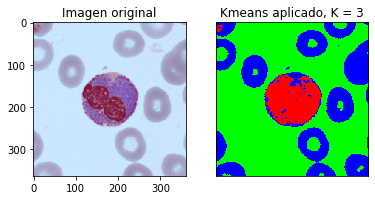

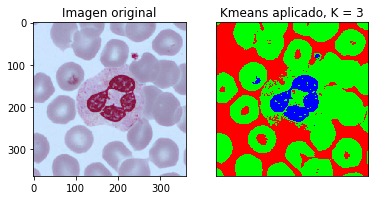

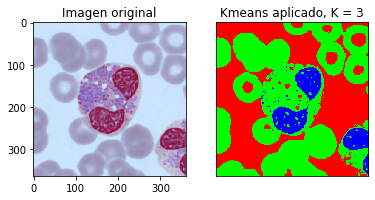

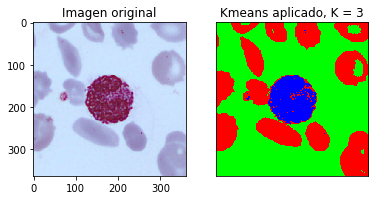

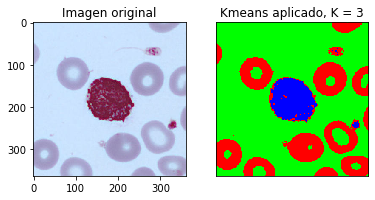

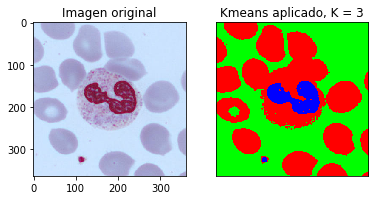

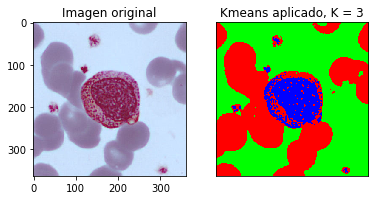

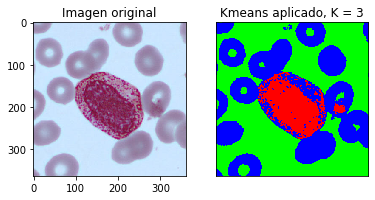

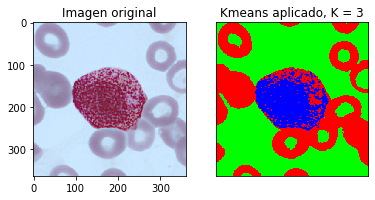

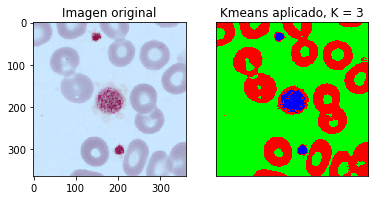

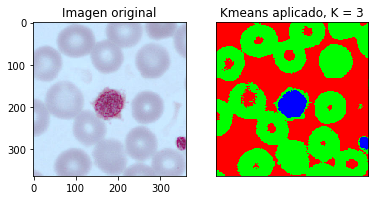

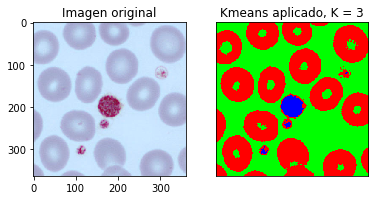

In [112]:
kmeans = KMeans(n_clusters = 3)
#Procesamiento de las imagenes originales
for p in im_paths:
    new_img = processImg(p,kmeans)  # matriz que tiene los nuevos datos a imagen
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
    ax1.imshow(cv2.imread(p))
    ax1.set_title("Imagen original")
    ax2.imshow(new_img,vmin=0,vmax=255),plt.xticks([]),plt.yticks([])
    ax2.set_title("Kmeans aplicado, K = 3")
    plt.show()

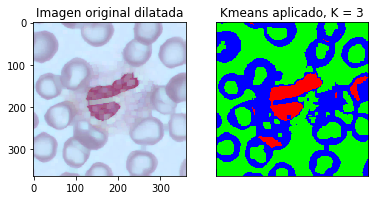

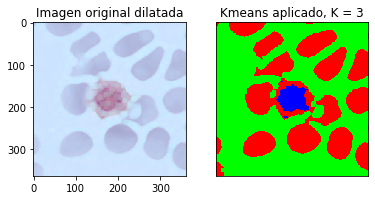

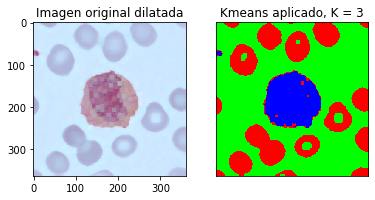

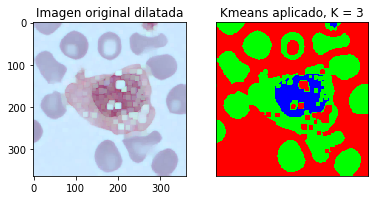

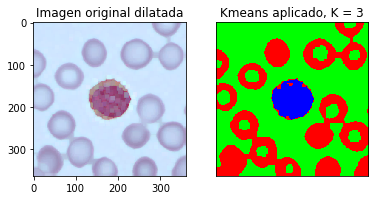

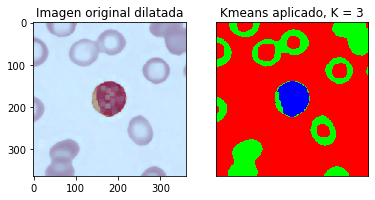

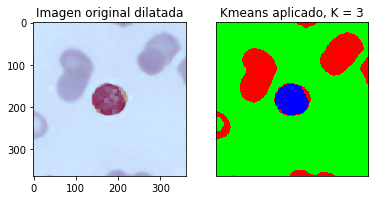

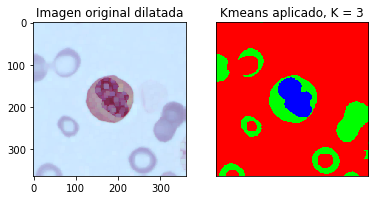

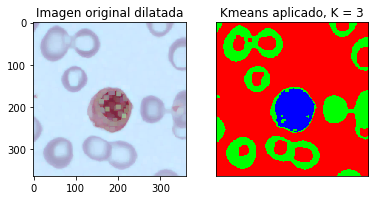

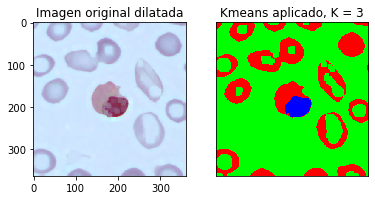

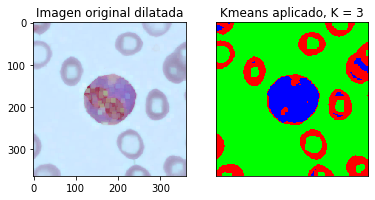

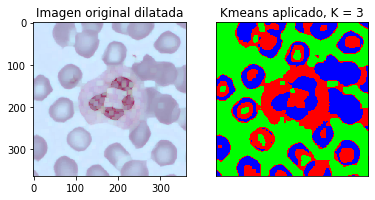

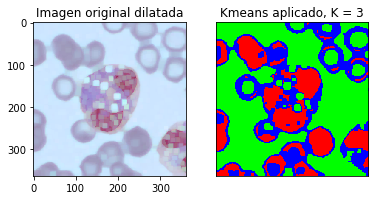

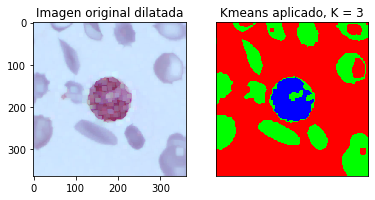

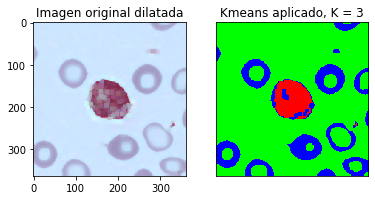

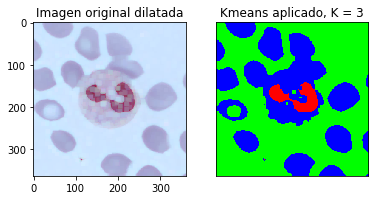

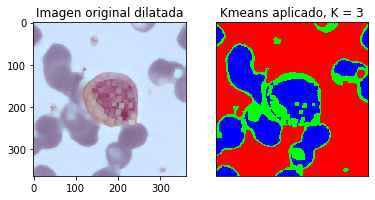

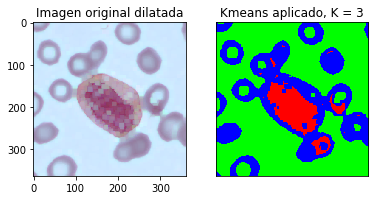

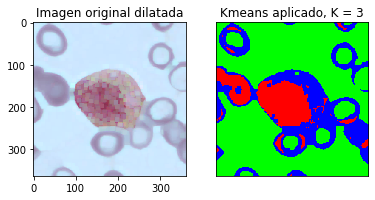

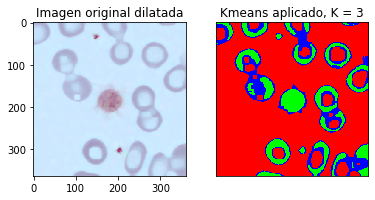

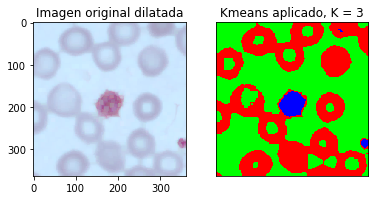

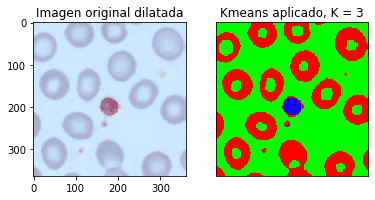

In [103]:
#Procesamiento de las imagenes originales luego del filtro de dilatacion
for p in im_paths:
    new_img = processImg(p,kmeans,True)  
    kernel=np.ones((5,5),np.uint8)
    img_dilatada=cv2.dilate(cv2.imread(p),kernel,iterations=2)
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
    ax1.imshow(img_dilatada)
    ax1.set_title("Imagen original dilatada")
    ax2.imshow(new_img,vmin=0,vmax=255),plt.xticks([]),plt.yticks([])
    ax2.set_title("Kmeans aplicado, K = 3")
    plt.show()

## Solución preguntas 

1) Al leer los datos de las imágenes estas estaban organizadas como un tensor, principalmente tres matrices juntas represtentado los valores RGB de un pixel cada una. Sin embargo es posible convertir este tensor en una matriz que esta compuesta por las filas representando cada pixel y las columnas que representan los tres componentes que describen el color en la imagen. Esta información la utilizamos para desglosar la imagen en cada una de las tres componentes RGB para procesarlo posteriormente.

2) La transformación inicial que se le hizo a los datos fue estandarizar cada uno de los puntos restándoles la media
y dividiéndolos por la desviación estándar, el objetivo con esto era segmentar de forma mas evidente el conjunto de
datos pertenecientes a cada closter para que se reflejaran los colores mejor en la imagen. Luego nos dimos cuenta de que la estandarización no solucionaba el problema que teníamos, sino que se necesitaba pre-procesar la imagen aplicando una función de dilatación del color para agregue pixeles en los límites de los “objetos” de acuerdo a su vecindad. Después de este filtro el resultado será una segmentación mucho mas clara de la imagen.

3) No se le hizo mejoras al algoritmo de salida pues consideramos que la segmentacion era la adecuada en la gran mayoria de las imagenes procesadas

4) El valor de $k$ principalmente se escogió en principio a criterio nuestro, visualizando los datos que teníamos es posible ver tres divisiones en las imagenes que vendrian a ser el citoplasma, el nucleo de la celula y el fondo. Tambien otra forma de asegurarnos de que este es el $k$ apropiado fue con el cirterio del Elbow, donde se puede observar que el comportamiento de codo se da con $k=3$ 

5) Los centroides no son iguales para todas las imágenes, esto se debe a que algunas imágenes están mas cargadas de un color que otras, por lo que en algunos casos algún centroide se carga mas de puntos que otros

6) Consideramos que el algoritmo de k-means puede ser muy poderoso en este tipo de problemas que requieren la clasificación de los datos, en este caso clasificar es un metodo eficiente para ya con la calsificacion de cada pixel de acuerdo a su color se logra segmentar la imagen de manera adecueda. Sin embargo, con este tipo de modelo es fundamental analizar, entender y si es necesario transformar la información que es estamos manejando para obtener los resultados esperados. 